In [1]:
# what we are studying
model = "LR"
dataset = "census"
sensitive_param = "sex"
import os
os.chdir('./jupyter_analysis')

FileNotFoundError: [Errno 2] No such file or directory: './jupyter_analysis'

In [2]:
import pandas as pd
df = pd.read_csv("../Dataset" + "/" + f"{model}_{dataset}_{sensitive_param}_x100.csv")
print(f"Min score: {df['score'].min()}")
print(f"Max score: {df['score'].max()}")
print(f"Min AOD: {df['AOD'].min()}")
print(f"Max AOD: {df['AOD'].max()}")

Min score: 0.7953568357695615
Max score: 0.8123080702616386
Min AOD: 0.0043999817807793
Max AOD: 0.217579893502967


In [2]:
print(f"Best AOD: {df[df['AOD'] == df['AOD'].min()].iloc[0].inp}")
print(f"Best accuracy: {df[df['score'] == df['score'].max()].iloc[0].inp}")

NameError: name 'df' is not defined

## Recreating the best model

In [4]:
import ast
import sys
sys.path.append("../subjects/")

import numpy as np
import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from adf_data.census import census_data
from adf_data.credit import credit_data
from adf_data.bank import bank_data
from adf_data.compas import compas_data
import matplotlib.pyplot as plt
os.chdir('../')

['/home/normenyu/Parfait-ML/jupyter_analysis', '/home/normenyu/anaconda3/lib/python39.zip', '/home/normenyu/anaconda3/lib/python3.9', '/home/normenyu/anaconda3/lib/python3.9/lib-dynload', '', '/home/normenyu/anaconda3/lib/python3.9/site-packages', '/home/normenyu/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg', '/home/normenyu/anaconda3/lib/python3.9/site-packages/IPython/extensions', '/home/normenyu/.ipython', '../subjects/', '../', '../']


Unfortunately, we HAVE to standardize the data in order to make an "apples-to-apples" comparison.

In [5]:
data = {"census":census_data, "credit":credit_data, "bank":bank_data, "compas": compas_data}
X, Y, input_shape, nb_classes = data[dataset]()
Y = np.argmax(Y, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)
std = StandardScaler()
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

### The most fair model has the following coeficients

[2, 1, 1, 0.5404340743311927, 20.260143354462727, 0, 2.2039546926516187, 9536, 1, 0, 1, 1, 1, 1, 0]
['liblinear', 'l2', True, 0.5404340743311927, 20.260143354462727, False, 2.2039546926516187, 9536, 'multinomial', 'none', 'balanced', 'int', 1, True, 'None']
['liblinear', 'l2', True, 0.5404340743311927, 20.260143354462727, False, 2.2039546926516187, 9536, 'ovr', None, None, 2019, 0, True, None]
[[ 0.30553868  0.91426869  0.03415987 -0.04975052 -0.64042566 -1.04448287
  -0.2516246  -0.08569369  0.11826748  8.58048377  0.28057054  0.3397775
  -0.02646006]]
0.0
[956]
0.7929001351185359


Text(0, 0.5, 'weight')

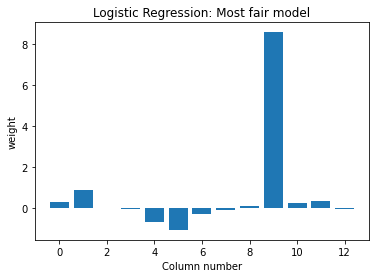

In [9]:
inp = ast.literal_eval(df[df['AOD'] == df['AOD'].min()].iloc[0]["inp"])
model = LogisticRegression.logistic_regression(inp, X_train, X_test, y_train, y_test, sensitive_param, dataset_name=dataset, save_model=True)[1]
print(model.coef_)
print(model.intercept_)
print(model.n_iter_)
print(model.score(X_test, y_test))
plt.bar(range(len(model.coef_[0])),model.coef_[0])
plt.title("Logistic Regression: Most fair model")
plt.xlabel("Column number")
plt.ylabel("weight")

### The most accurate model has the following coeficients

[2, 1, 1, 0.30434805790648234, 65.26585607495385, 1, 7.778986387054683, 9988, -1, 1, 0, 0, -6, 0, 0]
['liblinear', 'l2', True, 0.30434805790648234, 65.26585607495385, True, 7.778986387054683, 9988, 'ovr', 'rand', 'None', 'None', 0, False, 'None']
['liblinear', 'l2', True, 0.30434805790648234, 65.26585607495385, True, 7.778986387054683, 9988, 'ovr', None, None, 2019, 0, False, None]
[[ 0.39271728  1.08424038  0.04724548 -0.06943649 -1.00035622 -1.28918177
  -0.31505032 -0.12467124  0.17056573  2.65459181  0.2958675   0.44118546
  -0.04034877]]
[-1.58320203]
[5174]
0.806411988699177


Text(0, 0.5, 'weight')

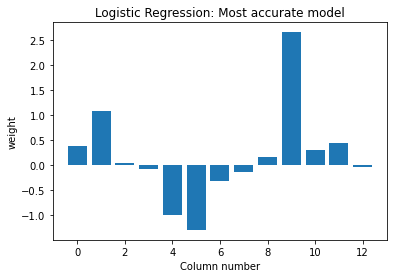

In [10]:
inp = ast.literal_eval(df[df['score'] == df['score'].max()].iloc[0]["inp"])
model = LogisticRegression.logistic_regression(inp, X_train, X_test, y_train, y_test, sensitive_param, dataset_name=dataset, save_model=True)[1]
print(model.coef_)
print(model.intercept_)
print(model.n_iter_)
print(model.score(X_test,y_test))
plt.bar(range(len(model.coef_[0])),model.coef_[0])
plt.title("Logistic Regression: Most accurate model")
plt.xlabel("Column number")
plt.ylabel("weight")

In [8]:
df[df['score'] == df['score'].max()]["AOD"].iloc[0]

0.030185402658811